In [ ]:
from src import customFunc as cf
from src import variances as vars

import numpy as np
import matplotlib.pyplot as plt
import os

import pyscf
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.operators import FermionicOp
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD

## Observable local sin ruido


Calculando varianzas con 4 qubits.



Varianza del valor esperado: 0.09479023343571256
Varianza de la derivada: 0.5081367908115687

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.03587990215232415
Varianza de la derivada: 0.2789664502839064

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.02189283030938408
Varianza de la derivada: 0.1231091701103911

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.011123606330693798
Varianza de la derivada: 0.06953421578479288

Pendiente para valor esperado: -0.3460904306855409.
R^2 para valor esperado: 0.9821719604740369.

Pendiente para derivada: -0.33924076101198103.
R^2 para derivada: 0.9952354712907571.


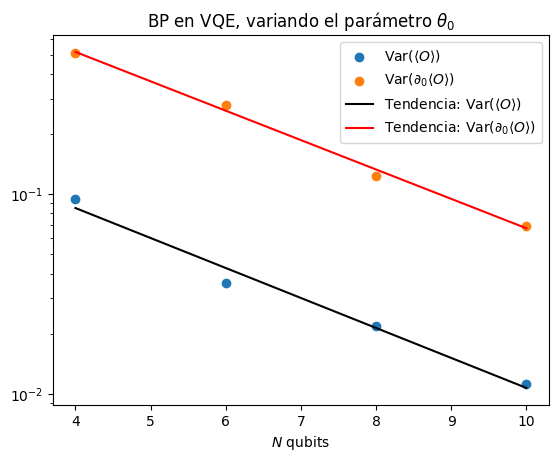

In [3]:
# Lo mismo que antes pero dejando fijo el número de electrones y escalando los orbitales

obs = FermionicOp({"+_1 -_0": 1.0})
mapper = JordanWignerMapper()
obs_qubit = mapper.map(obs)

def build_UCCSD_ansatz(num_qubits):

    num_spatial_orbitals = num_qubits // 2
    n_alpha = n_beta = 1
    num_particles = (n_alpha, n_beta)

    hf_initial_state = HartreeFock(
        num_spatial_orbitals=num_spatial_orbitals,
        num_particles=num_particles,
        qubit_mapper=mapper
    )

    ansatz = UCCSD(
        num_spatial_orbitals=num_spatial_orbitals,
        num_particles=num_particles,
        qubit_mapper=mapper,
        initial_state=hf_initial_state
    )

    return ansatz, ansatz.num_parameters

# ansatz, num_params = build_UCCSD_ansatz(4, obs_qubit)
# ansatz.decompose().draw("mpl")

data = []
data.append(vars.variance_vs_nQubits(build_UCCSD_ansatz, 4, 10, obs_qubit, 0, 1000, True, True, True, True, use_shift_rule=False))

## Observable local con ruido


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.0065769635915756235
Varianza de la derivada: 5039596.557617187

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.0003592684745788575
Varianza de la derivada: 5049585.1039886465

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.00023824689388275152
Varianza de la derivada: 4617398.977279662

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.00022190816402435304
Varianza de la derivada: 4393750.9059906

Pendiente para valor esperado: -0.5288978477180334.
R^2 para valor esperado: 0.7137617884431824.

Pendiente para derivada: -0.025045138584752012.
R^2 para derivada: 0.8914181000117835.


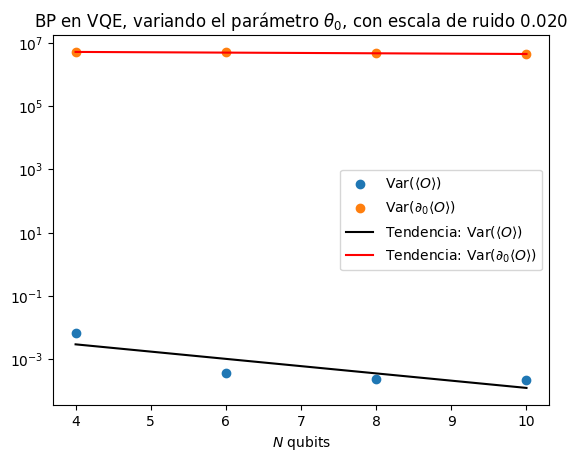

In [5]:
# Observable
obs = FermionicOp({"+_1 -_0": 1.0})
mapper = JordanWignerMapper()
obs_qubit = mapper.map(obs)

# Ansatz
def build_UCCSD_ansatz(num_qubits):

    num_spatial_orbitals = num_qubits // 2
    n_alpha = n_beta = 1
    num_particles = (n_alpha, n_beta)

    hf_initial_state = HartreeFock(
        num_spatial_orbitals=num_spatial_orbitals,
        num_particles=num_particles,
        qubit_mapper=mapper
    )

    ansatz = UCCSD(
        num_spatial_orbitals=num_spatial_orbitals,
        num_particles=num_particles,
        qubit_mapper=mapper,
        initial_state=hf_initial_state
    )

    return ansatz, ansatz.num_parameters


# Análisis del ruido
from qiskit.providers.fake_provider import FakeMontreal
fake_backend = FakeMontreal()
data_noise = []

data_noise.append(vars.noisy_variance_vs_nQubits(build_UCCSD_ansatz, fake_backend, 0.02, 4, 10, obs_qubit, 0, 100, print_info=True, plot_info=True, do_regress=True, only_even_qubits=True, use_shift_rule=False))

### Noise VS noise-free

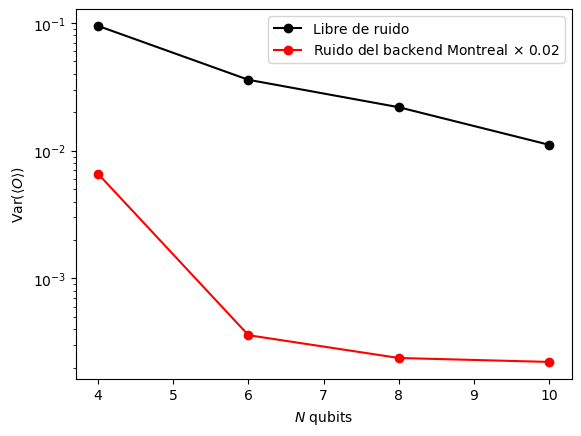

In [9]:
values = [0.09479023343571256, 0.03587990215232415, 0.02189283030938408, 0.011123606330693798]
values_noise = [0.0065769635915756235, 0.0003592684745788575, 0.00023824689388275152, 0.00022190816402435304]

qubits = [4, 6, 8, 10]

import matplotlib.pyplot as plt

plt.plot(qubits, values, color="black", marker="o", label="Libre de ruido")
plt.plot(qubits, values_noise, color="red", marker="o", label=r"Ruido del backend Montreal $\times$ 0.02")

plt.xlabel(r"$N$ qubits")
plt.ylabel(r"Var($\langle O\rangle$)")

plt.legend()
plt.yscale("log")
plt.show()

## Observable global sin ruido (6-UCCSD)


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.1180326862753844
Varianza de la derivada: 1.4036749002318263

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.04451347545307587
Varianza de la derivada: 0.3844609553948212

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.01946325204369051
Varianza de la derivada: 0.1720843310755151

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.019612136822418202
Varianza de la derivada: 0.15916797393383086

Pendiente para valor esperado: -0.3105851375036764.
R^2 para valor esperado: 0.8792040373276488.

Pendiente para derivada: -0.36672621730962884.
R^2 para derivada: 0.8782101444443231.


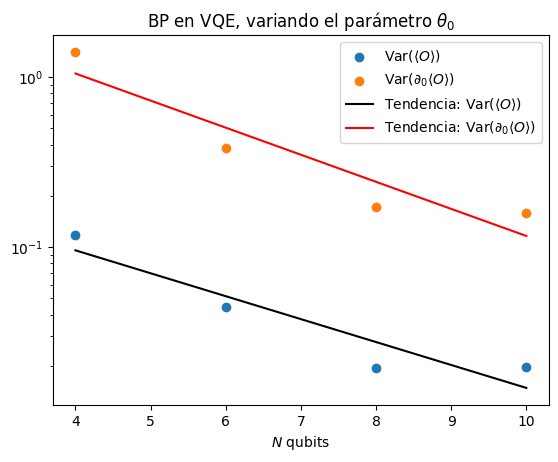

In [2]:
with open(f"data/hamiltonian_H2_0.700.pkl", "rb") as f:
    obs_qubit = pickle.load(f)

def build_k_UCCSD_ansatz(num_qubits, k=6, mapper=JordanWignerMapper()):
    num_spatial_orbitals = num_qubits // 2
    n_alpha = n_beta = 1
    num_particles = (n_alpha, n_beta)

    # Estado inicial Hartree-Fock
    hf = HartreeFock(
        num_spatial_orbitals=num_spatial_orbitals,
        num_particles=num_particles,
        qubit_mapper=mapper
    )

    # Creamos un UCCSD para extraer el número de parámetros
    uccsd_template = UCCSD(
        num_spatial_orbitals=num_spatial_orbitals,
        num_particles=num_particles,
        qubit_mapper=mapper,
        initial_state=None
    )
    
    # Forzamos construcción del circuito
    _ = uccsd_template.decompose()  # <--- esto construye internamente los operadores y parámetros

    # Obtenemos el número de parámetros
    num_params = len(uccsd_template.parameters)

    # Inicializamos circuito completo
    full_ansatz = QuantumCircuit(num_qubits)
    full_ansatz.compose(hf, inplace=True)

    all_parameters = []

    # Añadimos k capas de UCCSD
    for i in range(k):
        theta = ParameterVector(f'theta_{i}', num_params)
        all_parameters.extend(theta)

        ucc_i = UCCSD(
            num_spatial_orbitals=num_spatial_orbitals,
            num_particles=num_particles,
            qubit_mapper=mapper,
            initial_state=None
        )
        _ = ucc_i.decompose()  # <- de nuevo, forzamos construcción para tener acceso a parameters
        ucc_i = ucc_i.assign_parameters(dict(zip(ucc_i.parameters, theta)))

        full_ansatz.compose(ucc_i, inplace=True)

    return full_ansatz, full_ansatz.num_parameters


data = []
data.append(vars.variance_vs_nQubits(build_k_UCCSD_ansatz, 4, 10, obs_qubit, 0, 1000, True, True, True, True, use_shift_rule=False))

-0.3251328636966545


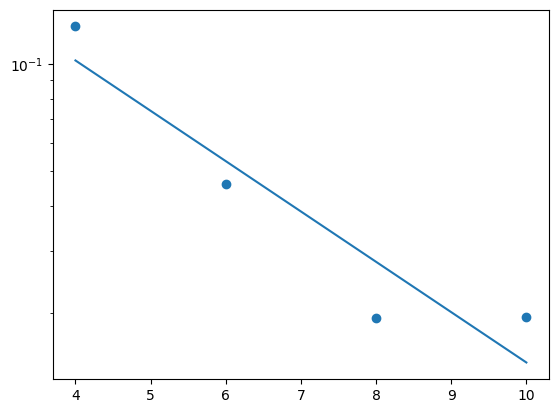

In [6]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

y_log = np.log(data[0]['var_value'])
regress_result = linregress(data[0]['n_qubits'], y_log)
print(regress_result.slope)

plt.scatter(data[0]['n_qubits'], data[0]['var_value'])
plt.yscale('log')

x = np.linspace(4, 10, 10)
y = np.exp(x*regress_result.slope+regress_result.intercept)
plt.plot(x,y)